In [1]:
import numpy as np
import pandas as pd
import re
import requests

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

from bs4 import BeautifulSoup

In [2]:
df = pd.read_json('data/receitas.json')

In [3]:
df

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0
...,...,...,...,...,...,...,...,...,...,...,...
20125,[Beat whites in a bowl with an electric mixer ...,2.0,2004-08-20 04:00:00+00:00,"[Mixer, Cheese, Egg, Fry, Cocktail Party, Parm...",28.0,None,2.0,3.125,Parmesan Puffs,"[2 large egg whites, 3 oz Parmigiano-Reggiano,...",64.0
20126,[Bring broth to simmer in saucepan.Remove from...,28.0,2008-02-28 22:06:54+00:00,"[Side, Kid-Friendly, High Fiber, Dinner, Parme...",671.0,Cooking the artichokes with the rice infuses t...,22.0,4.375,Artichoke and Parmesan Risotto,"[5 1/2 cups (or more) low-salt chicken broth, ...",583.0
20127,"[Using a sharp knife, cut a shallow X in botto...",38.0,2005-10-21 18:21:20+00:00,"[Onion, Poultry, turkey, Vegetable, Bake, Kid-...",563.0,None,31.0,4.375,Turkey Cream Puff Pie,"[1 small tomato, 1 small onion, finely chopped...",652.0
20128,[Heat 2 tablespoons oil in heavy medium skille...,24.0,2004-08-20 04:00:00+00:00,"[Milk/Cream, Citrus, Dairy, Fish, Garlic, Past...",631.0,"Sharon Hooykaas of Los Alamitos, California, w...",45.0,4.375,Snapper on Angel Hair with Citrus Cream,"[4 tablespoons olive oil, 4 shallots, thinly s...",517.0


In [4]:
# Limpar possíveis entradas duplicadas
df = df.drop_duplicates(subset=['fat', 'date', 'calories', 'desc', 'protein', 'rating', 
                                 'title','sodium'], keep='first').reset_index(drop=True)
df

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0
...,...,...,...,...,...,...,...,...,...,...,...
18289,[Beat whites in a bowl with an electric mixer ...,2.0,2004-08-20 04:00:00+00:00,"[Mixer, Cheese, Egg, Fry, Cocktail Party, Parm...",28.0,None,2.0,3.125,Parmesan Puffs,"[2 large egg whites, 3 oz Parmigiano-Reggiano,...",64.0
18290,[Bring broth to simmer in saucepan.Remove from...,28.0,2008-02-28 22:06:54+00:00,"[Side, Kid-Friendly, High Fiber, Dinner, Parme...",671.0,Cooking the artichokes with the rice infuses t...,22.0,4.375,Artichoke and Parmesan Risotto,"[5 1/2 cups (or more) low-salt chicken broth, ...",583.0
18291,"[Using a sharp knife, cut a shallow X in botto...",38.0,2005-10-21 18:21:20+00:00,"[Onion, Poultry, turkey, Vegetable, Bake, Kid-...",563.0,None,31.0,4.375,Turkey Cream Puff Pie,"[1 small tomato, 1 small onion, finely chopped...",652.0
18292,[Heat 2 tablespoons oil in heavy medium skille...,24.0,2004-08-20 04:00:00+00:00,"[Milk/Cream, Citrus, Dairy, Fish, Garlic, Past...",631.0,"Sharon Hooykaas of Los Alamitos, California, w...",45.0,4.375,Snapper on Angel Hair with Citrus Cream,"[4 tablespoons olive oil, 4 shallots, thinly s...",517.0


In [5]:
df.describe()

,fat,calories,protein,rating,sodium
count,1.447700e+04,1.453000e+04,14497.000000,18283.000000,1.452900e+04
mean,3.627807e+02,6.610385e+03,92.086363,3.713388,6.562446e+03
std,2.133778e+04,3.744207e+05,3508.485919,1.335214,3.480814e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,8.000000e+00,2.050000e+02,3.000000,3.750000,8.800000e+01
50%,1.800000e+01,3.450000e+02,9.000000,4.375000,3.040000e+02
75%,3.400000e+01,5.990000e+02,28.000000,4.375000,7.320000e+02
max,1.722763e+06,3.011122e+07,236489.000000,5.000000,2.767511e+07


## 1. Que categorias pertencem as comidas mais calóricas?

In [6]:
# Coletar as possíveis categorias do primeiro quartil (25%) das receitas mais calóricas
categories = df.sort_values('calories', ascending=False).categories.dropna()[:int(len(df)/4)].to_list()
categories

[['Berry',
  'Fruit',
  'Nut',
  'Dessert',
  'Bake',
  'Christmas',
  'Thanksgiving',
  'Cranberry',
  'Pear',
  'Walnut',
  'Fall',
  'Winter',
  'Gourmet',
  'Vegetarian',
  'Pescatarian',
  'Peanut Free',
  'Soy Free',
  'Kosher'],
 ['Egg', 'Fruit', 'Bake', 'Blueberry', 'Summer', 'Tapioca', 'Gourmet'],
 ['Berry',
  'Fruit',
  'Nut',
  'Dessert',
  'Bake',
  'Thanksgiving',
  'Cranberry',
  'Apricot',
  'Walnut',
  'Fall',
  'Bon Appétit',
  'Vegetarian',
  'Pescatarian',
  'Wheat/Gluten-Free',
  'Peanut Free',
  'Soy Free',
  'Kosher'],
 ['Food Processor',
  'Backyard BBQ',
  'Ground Lamb',
  'Spice',
  'Summer',
  'Grill',
  'Grill/Barbecue',
  'Cinnamon',
  'Clove',
  'Parsley',
  'Gourmet'],
 ['Lamb',
  'Rice',
  'Vegetable',
  'Braise',
  'Dinner',
  'Raisin',
  'Meat',
  'Lamb Shank',
  'Root Vegetable',
  'Carrot',
  'Fall',
  'Winter',
  'Gourmet',
  'Wheat/Gluten-Free',
  'Peanut Free',
  'Tree Nut Free',
  'Soy Free',
  'No Sugar Added'],
 ['Chocolate',
  'Nut',
  'Dessert

In [7]:
# Transformar em uma única lista de categorias
categories_list = []
for categorie in categories:
    for cat in categorie:
        categories_list.append(cat)
# Transformar em um pandas Series e excluir repetições
categories_list = pd.Series(categories_list).unique()
categories_list

array(['Berry', 'Fruit', 'Nut', 'Dessert', 'Bake', 'Christmas',
       'Thanksgiving', 'Cranberry', 'Pear', 'Walnut', 'Fall', 'Winter',
       'Gourmet', 'Vegetarian', 'Pescatarian', 'Peanut Free', 'Soy Free',
       'Kosher', 'Egg', 'Blueberry', 'Summer', 'Tapioca', 'Apricot',
       'Bon Appétit', 'Wheat/Gluten-Free', 'Food Processor',
       'Backyard BBQ', 'Ground Lamb', 'Spice', 'Grill', 'Grill/Barbecue',
       'Cinnamon', 'Clove', 'Parsley', 'Lamb', 'Rice', 'Vegetable',
       'Braise', 'Dinner', 'Raisin', 'Meat', 'Lamb Shank',
       'Root Vegetable', 'Carrot', 'Tree Nut Free', 'No Sugar Added',
       'Chocolate', 'Almond', 'Christmas Eve', 'Apple', 'Quick & Easy',
       'Pan-Fry', 'Couscous', 'Mushroom', 'Mustard', "Father's Day",
       'Lamb Chop', 'Sugar Conscious', 'Chicken', 'Beef', 'Beef Rib',
       'Red Wine', 'Duck', 'Onion', 'Poultry', 'Roast', 'Parsnip',
       'White Wine', 'Shallot', 'Dairy Free', 'Citrus', 'Ginger',
       'Super Bowl', 'Orange', 'Poker/Game Ni

In [8]:
# Criar um data frame com todas as possíveis categorias
df_categories = pd.DataFrame({'categories': categories_list, 'count': 0}).set_index('categories')
df_categories

,count
categories,
Berry,0
Fruit,0
Nut,0
Dessert,0
Bake,0
...,...
Emeril Lagasse,0
snack,0
Wisconsin,0


In [9]:
# Contar categorias presentes nas receitas mais calóricas
for i in range(len(categories)):
    for cat in categories[i]:
        df_categories.loc[cat, 'count'] += 1
df_categories

,count
categories,
Berry,83
Fruit,439
Nut,226
Dessert,799
Bake,1215
...,...
Emeril Lagasse,1
snack,1
Wisconsin,1


In [10]:
#1. A categorias pertencem as comidas mais calóricas?
df_categories.sort_values('count', ascending=False).head()

,count
categories,
Bon Appétit,2394
Peanut Free,1863
Soy Free,1794
Tree Nut Free,1496
Gourmet,1457


## 2. Quais os top 10 ingredientes contidos nas receitas mais calóricas?

In [11]:
# Coletar os ingredientes das receitas mais calóricas
ingredients = df.sort_values('calories', ascending=False).ingredients.fillna("")[:int(len(df)/4)].to_list()
ingredients

[['2 firm-ripe Anjou pears, peeled, cored, and finely chopped',
  '1/2 cup dried sour cherries',
  '1/2 cup dried currants',
  '1/2 cup dried cranberries',
  '1/2 cup packed light brown sugar',
  '1/4 cup brandy',
  '2 teaspoons finely grated fresh lemon zest',
  '2 teaspoons finely grated fresh orange zest',
  '2 tablespoons fresh lemon juice',
  '1/2 teaspoon cinnamon',
  '1/2 teaspoon ground allspice',
  '1/4 teaspoon freshly grated nutmeg',
  '1/8 teaspoon salt',
  '3/4 cup walnuts (2 3/4 oz), toasted and finely chopped',
  'Pastry dough for a double-crust pie'],
 ['1 1/4 cups packed light brown sugar',
  '5 tablespoons quick-cooking tapioca',
  '6 cups fresh wild blueberries or 3 (10-ounce) packages frozen (not thawed)',
  '1 tablespoon fresh lemon juice',
  'Pastry dough for a double-crust pie',
  '1 tablespoon unsalted butter, cut into small pieces',
  '1 large egg, beaten with 1 tablespoon water',
  'a 9 1/2-inch deep-dish pie plate (6-cup capacity); small decorative cookie cut

In [12]:
# Lista com unidades e palavras-chave para "limpar" ingredientes
unit_list = [
    r'[0-9]+/? ', r'^[0-9]+/?', r'cup[s]? ', r'teaspoon[s]? ', r'tablespoon[s]? ', r'large? ',
    r'fresh[ly]?[y]?', r's$', r'extra-virgin ', r'all[- ]purpose ', r', divided', r'chopped ',
    r'dried ', r'[ ]?ground [ ]?', r'coarse ', r'granulated ', r' white', r' yolk', r'firm-ripe ',
    r'peeled,', r'cored,', r'finely,', r'chopped', r'canned ', r'whole ', r'crushed', r'slices ',
    r'grain ', r'roll', r'into', r'cut',
]

# Função auxiliar que dado um ingrediente, remove todos os padrões na lista
def get_ingredients(ingredient):
    if ingredient:
        for unit in unit_list:
            ingredient = re.sub(unit, '', ingredient)
    return ingredient

In [13]:
# Coletar todos os possíveis ingredientes
ingredients_list = []
for item in ingredients:   
    for subitem in item:
        subitem_list = get_ingredients(subitem.lower())
        ingredients_list.append(subitem_list)
ingredients_list = pd.Series(ingredients_list).unique()
ingredients_list

array(['anjou pears,   and finely ', 'sour cherrie', 'currant', ...,
       '-inch piece of tangerine peel', 'five-spice powder',
       'small pineapple, peeled and   1/2-inch chunk'], dtype=object)

In [14]:
# Criar um data frame com todas os possíveis ingredientes.
df_ingredients = pd.DataFrame({'ingredients': ingredients_list, 'count': 0}).set_index('ingredients')
df_ingredients

,count
ingredients,
"anjou pears, and finely",0
sour cherrie,0
currant,0
cranberrie,0
packed light brown sugar,0
...,...
"pounds pork butt, 1/2-inch cube",0
"scallions (green and parts), minced",0
-inch piece of tangerine peel,0


In [15]:
# Contar ingredientes presentes nas receitas mais calóricas
for i in range(len(ingredients)):
    for item in ingredients[i]:
        df_ingredients.loc[get_ingredients(item.lower()), 'count'] += 1
df_ingredients

,count
ingredients,
"anjou pears, and finely",1
sour cherrie,1
currant,34
cranberrie,20
packed light brown sugar,57
...,...
"pounds pork butt, 1/2-inch cube",1
"scallions (green and parts), minced",1
-inch piece of tangerine peel,1


In [16]:
#2. Quais os top 10 ingredientes contidos nas receitas mais calóricas?
df_ingredients.sort_values('count', ascending=False).head(10)

,count
ingredients,
olive oil,1865
salt,1433
sugar,1314
egg,970
flour,894
black pepper,806
water,678
lemon juice,596
kosher salt,565


## 3. Se você tivesse que recomendar 3 receitas baseando-se nos dados, quais seriam?

Tomei como base as receitas que tem menos calorias que a mediana, mais proteínas que a mediana e menos sódio que a mediana, ordenada por receitas com menos gordura

In [17]:
#3. Se você tivesse que recomendar 3 receitas baseando-se nos dados, quais seriam?
df[(df.calories < df.calories.median()) & (df.protein > df.protein.median()) & 
   (df.sodium<df.sodium.median())].sort_values(
    ['rating', 'protein', 'calories', 'sodium', 'fat'], ascending=[False, False, True, True, True]).head(3)

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
9968,[Remove the duck breasts from the refrigerator...,9.0,2013-10-01 04:00:00+00:00,"[Citrus, Duck, Fruit, Poultry, Dinner, Orange,...",324.0,This is a modern rendition of a nineteenth-cen...,42.0,5.0,Duck Bigarade,"[1 1/2 to 2 pounds duck breasts, Kosher salt, ...",209.0
14145,"[Place turkey wings and neck, heart, and gizza...",18.0,2010-10-15 04:00:00+00:00,"[turkey, Thanksgiving, Celery, Leek, Carrot, S...",314.0,None,32.0,5.0,Ultimate Turkey Stock,"[5 1/2 pounds turkey wings Neck, heart, and gi...",137.0
4760,[Cut the carrot and spring onions into a fine ...,8.0,2004-08-20 04:00:00+00:00,"[Egg, Fish, No-Cook, Pine Nut, Tuna, Cabbage, ...",213.0,Editor's note: The recipe and introductory tex...,28.0,5.0,Korean-Style Tuna Tartare,"[2 medium carrots, 4 spring onions, 1 400 g (1...",83.0


## 4. Alguma característica presente nos dados determina a alta nota de uma receita?

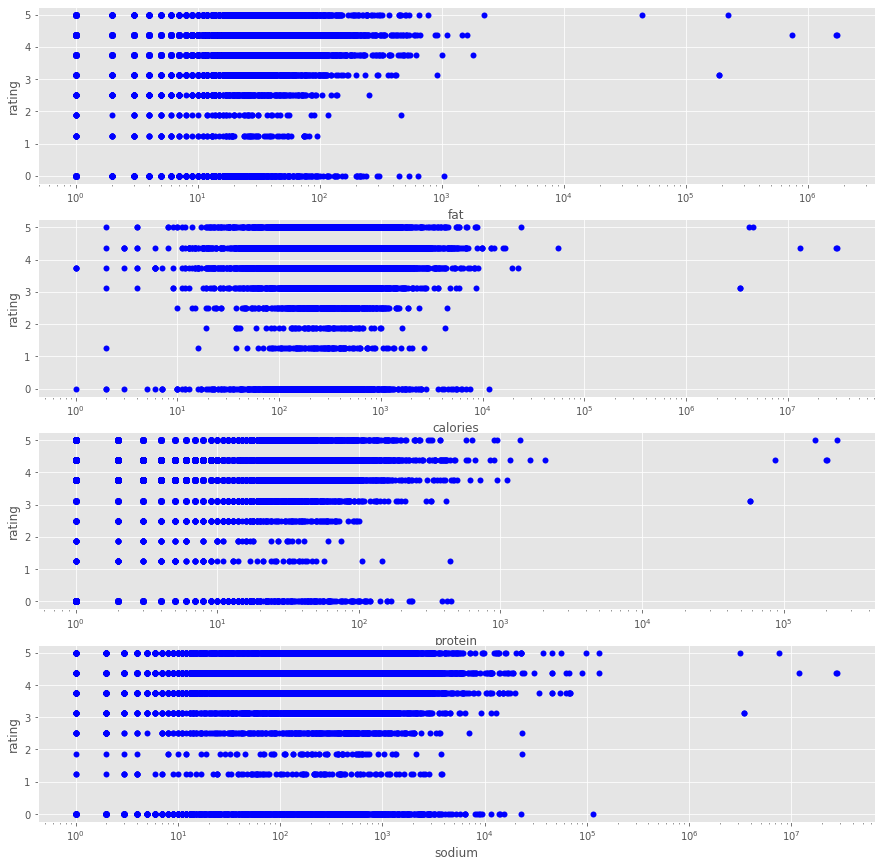

In [18]:
# Plotar os gráficos das características numéricas para verificar há alguma correlação
x = {0:'fat', 1:'calories', 2:'protein', 3:'sodium'}
figs, axes = plt.subplots(4,1,figsize=(15,15))
for axe in range(4):
    axes[axe].plot(df[x[axe]] ,df['rating'], 'o', c='blue', markeredgecolor='none')
    axes[axe].set_xscale('log')
    axes[axe].set_ylabel('rating')
    axes[axe].set_xlabel(x[axe])

Não dá pra tirar muitas conclusões dos gráficos...

In [19]:
#4. Alguma característica presente nos dados determina a alta nota de uma receita?
df.corr(method='pearson')

,fat,calories,protein,rating,sodium
fat,1.000000,0.996527,0.770940,0.006925,0.986456
calories,0.996527,1.000000,0.803337,0.007569,0.996518
protein,0.770940,0.803337,1.000000,0.012272,0.819284
rating,0.006925,0.007569,0.012272,1.000000,0.008004
sodium,0.986456,0.996518,0.819284,0.008004,1.000000


Como esperado, existe uma correlação entre gordura, calorias e sódio, mas parece não haver uma característica que determina a alta nota (rating) de uma receita

## 5. Considerando-se as categorias das top 100 receitas em avaliação, quantas receitas há atualmente no site https://www.epicurious.com para cada categoria

In [20]:
df_rating = df.sort_values('rating', ascending=False)[:100]
df_rating

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
2106,[Cut off most of the fatty flap of neck skin a...,NaN,2004-08-20 04:00:00+00:00,"[Duck, Vegetable, Fry, Sauté, Dinner, Parsnip,...",NaN,None,NaN,5.0,Jacques's Skillet Duck with Parsnips and Shall...,"[1 duck, 5 to 5 1/2 pounds, defrosted if froze...",NaN
12747,"[Heat oven to 350°F with rack in lower third.,...",149.0,2011-12-21 04:00:00+00:00,"[Beef, Herb, Olive, Tomato, Braise, Hanukkah, ...",1726.0,"Olives, garlic, herbs, tomato, and wine come t...",59.0,5.0,Provençal Short Ribs with Olives and Herbs,"[1/3 cup all-purpose flour, Salt, Freshly grou...",831.0
8907,"[In a bowl combine the Triple Sec, the brandy,...",0.0,2004-08-20 04:00:00+00:00,"[Champagne, Punch, Alcoholic, Picnic, Backyard...",251.0,None,0.0,5.0,Champagne Punch,"[1 cup Triple Sec, 1 cup brandy, 1/2 cup Chamb...",13.0
10525,[Preheat oven to 350°F. Place large piece of f...,46.0,2004-08-20 04:00:00+00:00,"[Cake, Food Processor, Mixer, Chocolate, Desse...",718.0,None,11.0,5.0,White Chocolate and Raspberry Cheesecake,"[18 vanilla wafer cookies, 1 cup almonds, toas...",301.0
5721,"[Line six 2/3-cup ramekins with plastic wrap, ...",37.0,2004-08-20 04:00:00+00:00,"[Salad, Leafy Green, Brunch, Easter, Lunch, Go...",436.0,A great combination of flavors that makes an e...,21.0,5.0,Prosciutto and Goat Cheese Timbales with Mixed...,"[12 to 16 thin slices prosciutto, 10 ounces so...",1220.0
...,...,...,...,...,...,...,...,...,...,...,...
1779,"[Whisk 1/2 cup reduced-sodium soy sauce, 2 tab...",3.0,2011-06-15 04:00:00+00:00,"[Sauce, Garlic, Ginger, Marinate, Quick & Easy...",130.0,We love this marinade on Kalbi . Try it for an...,7.0,5.0,Korean BBQ Marinade,"[1/2 cup reduced-sodium soy sauce, 2 tablespoo...",2303.0
3432,[1. To make the apple butter: In a large sauce...,NaN,2013-08-21 04:00:00+00:00,"[Dessert, Bake, Apple, Fall, Kidney Friendly, ...",NaN,When I started working at Payard Pâtisserie in...,NaN,5.0,Apple Pithivier,"[6 apples, such as Granny Smith, peeled, halve...",NaN
10553,"[Mix flour, sugar and salt in processor. Add s...",23.0,2004-08-20 04:00:00+00:00,"[Dessert, Bake, Christmas, Almond, Cashew, Pec...",364.0,"Filled with a mixture of nuts, brown sugar, ho...",5.0,5.0,Nutcracker Tart,"[1 1/4 cups all purpose flour, 2 teaspoons sug...",106.0
5778,"[Preheat oven to 375° F., Halve pitas horizont...",NaN,2004-08-20 04:00:00+00:00,"[Bread, Bake, Quick & Easy, Gourmet]",NaN,This recipe was created to accompany Chunky Cl...,NaN,5.0,Pita Toasts,"[four 6-inch pita loaves, about 1/4 cup olive ...",NaN


In [21]:
categorie_rating = df.sort_values('rating', ascending=False).categories[:100].fillna("").to_frame()
categorie_rating

,categories
2106,"[Duck, Vegetable, Fry, Sauté, Dinner, Parsnip,..."
12747,"[Beef, Herb, Olive, Tomato, Braise, Hanukkah, ..."
8907,"[Champagne, Punch, Alcoholic, Picnic, Backyard..."
10525,"[Cake, Food Processor, Mixer, Chocolate, Desse..."
5721,"[Salad, Leafy Green, Brunch, Easter, Lunch, Go..."
...,...
1779,"[Sauce, Garlic, Ginger, Marinate, Quick & Easy..."
3432,"[Dessert, Bake, Apple, Fall, Kidney Friendly, ..."
10553,"[Dessert, Bake, Christmas, Almond, Cashew, Pec..."
5778,"[Bread, Bake, Quick & Easy, Gourmet]"


In [22]:
# Coletar todas as possíveis categorias
categories_list = []
for categorie in categorie_rating.categories:
    for cat in categorie:
        categories_list.append(cat)
categorie_rating_list = pd.Series(categories_list).unique()
categorie_rating_list

array(['Duck', 'Vegetable', 'Fry', 'Sauté', 'Dinner', 'Parsnip', 'Fall',
       'Shallot', 'Dairy Free', 'Wheat/Gluten-Free', 'Peanut Free',
       'Tree Nut Free', 'Soy Free', 'No Sugar Added', 'Kosher', 'Beef',
       'Herb', 'Olive', 'Tomato', 'Braise', 'Hanukkah', 'Meat',
       'Beef Rib', 'Winter', 'Gourmet', 'Champagne', 'Punch', 'Alcoholic',
       'Picnic', 'Backyard BBQ', 'Cocktail', 'Pineapple', 'Brandy',
       'Chambord', 'Triple Sec', 'Spring', 'Summer', 'Chill', 'Drink',
       'Cake', 'Food Processor', 'Mixer', 'Chocolate', 'Dessert', 'Bake',
       "Valentine's Day", 'Cream Cheese', 'Raspberry', 'Almond', 'Party',
       'Sour Cream', 'Bon Appétit', 'Vegetarian', 'Pescatarian', 'Salad',
       'Leafy Green', 'Brunch', 'Easter', 'Lunch', 'Goat Cheese',
       'Green Bean', 'Prosciutto', 'Sugar Conscious', 'Steak', 'Coffee',
       'Chile Pepper', 'Oregano', 'Rub', 'Coriander', 'Las Vegas',
       'Paprika', 'Pork', 'Breakfast', 'Kid-Friendly', 'Quick & Easy',
       'Pa

In [23]:
# Criar um data frame com todas as possíveis categorias.
df_ratings = pd.DataFrame({'categories': categorie_rating_list, 'count': 0}).set_index('categories')
df_ratings

,count
categories,
Duck,0
Vegetable,0
Fry,0
Sauté,0
Dinner,0
...,...
Salad Dressing,0
Jam or Jelly,0
Green Onion/Scallion,0


In [24]:
# Scrapping
URL = 'https://www.epicurious.com/search/'
content = '?content=recipe'
for index, data in df_ratings.iterrows():
    r = requests.get(url=URL+index+content)
    parsed_page = BeautifulSoup(r.text,"html.parser")
    
    articles = parsed_page.find_all('p', {'class':"results-message"})
    for article in articles:
        found = article.find('span', {'class':'matching-count'}).getText()
        if found:
            df_ratings.loc[index, 'count'] = found

In [25]:
df_ratings

,count
categories,
Duck,219
Vegetable,"3,697"
Fry,"1,669"
Sauté,"3,244"
Dinner,"5,983"
...,...
Salad Dressing,833
Jam or Jelly,238
Green Onion/Scallion,0


In [26]:
"""count = 0
URL = 'https://www.epicurious.com/search/'
for index, data in df[:100].iterrows():
    r = requests.get(url=URL+data.title)
    parsed_page = BeautifulSoup(r.text,"html.parser")
    articles = parsed_page.find_all(
        'article', itemtype="https://schema.org/Recipe")
    for article in articles:
        found = article.find('a', title=data.title)
        if found:
            count = count+1
count
"""

'count = 0\nURL = \'https://www.epicurious.com/search/\'\nfor index, data in df[:100].iterrows():\n    r = requests.get(url=URL+data.title)\n    parsed_page = BeautifulSoup(r.text,"html.parser")\n    articles = parsed_page.find_all(\n        \'article\', itemtype="https://schema.org/Recipe")\n    for article in articles:\n        found = article.find(\'a\', title=data.title)\n        if found:\n            count = count+1\ncount\n'